### Calibrate to NHIS data

by looking at smoking rates from 2016-2020

varying initiation and continuation params

In [7]:
from glob import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
files = sorted(glob("../../outputs/numpy_arrays/np_output_calibrated_to_NHIS_*"))
len(files)
# print(files)

101

In [9]:
# target_arr = pd.read_excel("/home/nick/Gillings_work/nhis_data/NHIS_smoker_proportions./NHIS_State_age/NHIS_State_age/NHIS_Smoker_age/percent_smoker_by_year.xlsx").to_numpy()
# target_arr = pd.read_excel("/home/nick/Gillings_work/nhis_data/NHIS_smoker_proportions./NHIS_State_age/NHIS_State_age/percent_34_by_year.xlsx").to_numpy()
# target_arr = target_arr[:,1] / 100
# target_arr

target_arr = pd.read_excel("/Users/nick/Documents/Gillings_work/nhis_data/NHIS_state_age_Sep2022.xlsx").to_numpy()
target_arr = target_arr[2::5,3]
target_arr /= 100
target_arr

array([0.1513160774813408, 0.13729302965096327, 0.1343997623978405,
       0.1336313651838806, 0.12339752606221008], dtype=object)

In [13]:
x = []
y = []

for i in range(21):
    j = 5.0 + i / 10
    n_str = str(j)
    while len(n_str) < 3:
        n_str = "0" + n_str
    print(n_str)
    files = sorted(glob(f"../../outputs/numpy_arrays/np_output_calibrated_to_NHIS_{n_str}*"))
    x.append(j)
    to_avg = []

    for f in files:
        arr = np.load(f)
        arr = np.sum(arr, axis=(1,2))
        smoking_percents = np.sum(arr[:,2:4], axis=1) / np.sum(arr[:,0:5], axis=1)
        smoking_percents = smoking_percents[:5]
        # print(num, smoking_percents)

        metric = np.linalg.norm(smoking_percents - target_arr)
        to_avg.append(metric)

    y.append(np.mean(metric))

5.0
5.1
5.2
5.3
5.4
5.5
5.6
5.7
5.8
5.9
6.0
6.1
6.2
6.3
6.4
6.5
6.6
6.7
6.8
6.9
7.0


In [14]:
m = np.argmin(y)
print(x[m])
print(y[m])

5.5
0.007053047719057882


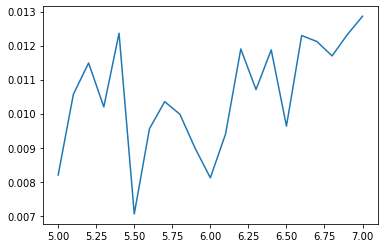

In [15]:
data = zip(x,y)
data = sorted(data, key=lambda x: x[0])
x = [d[0] for d in data]
y = [d[1] for d in data]
plt.plot(x,y)
plt.show()